In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Step 1: Load and understand the data

Step 2: Check data types and details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   o

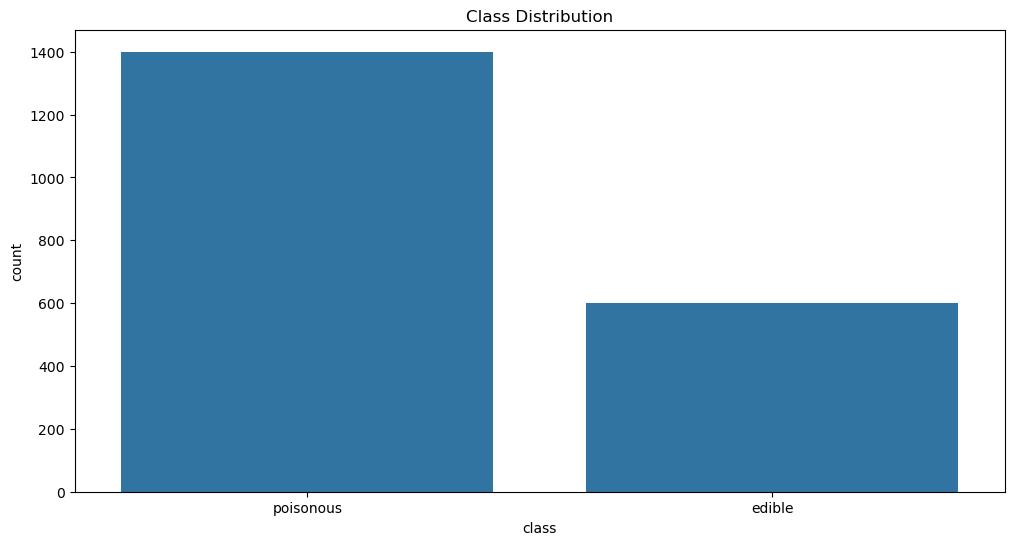

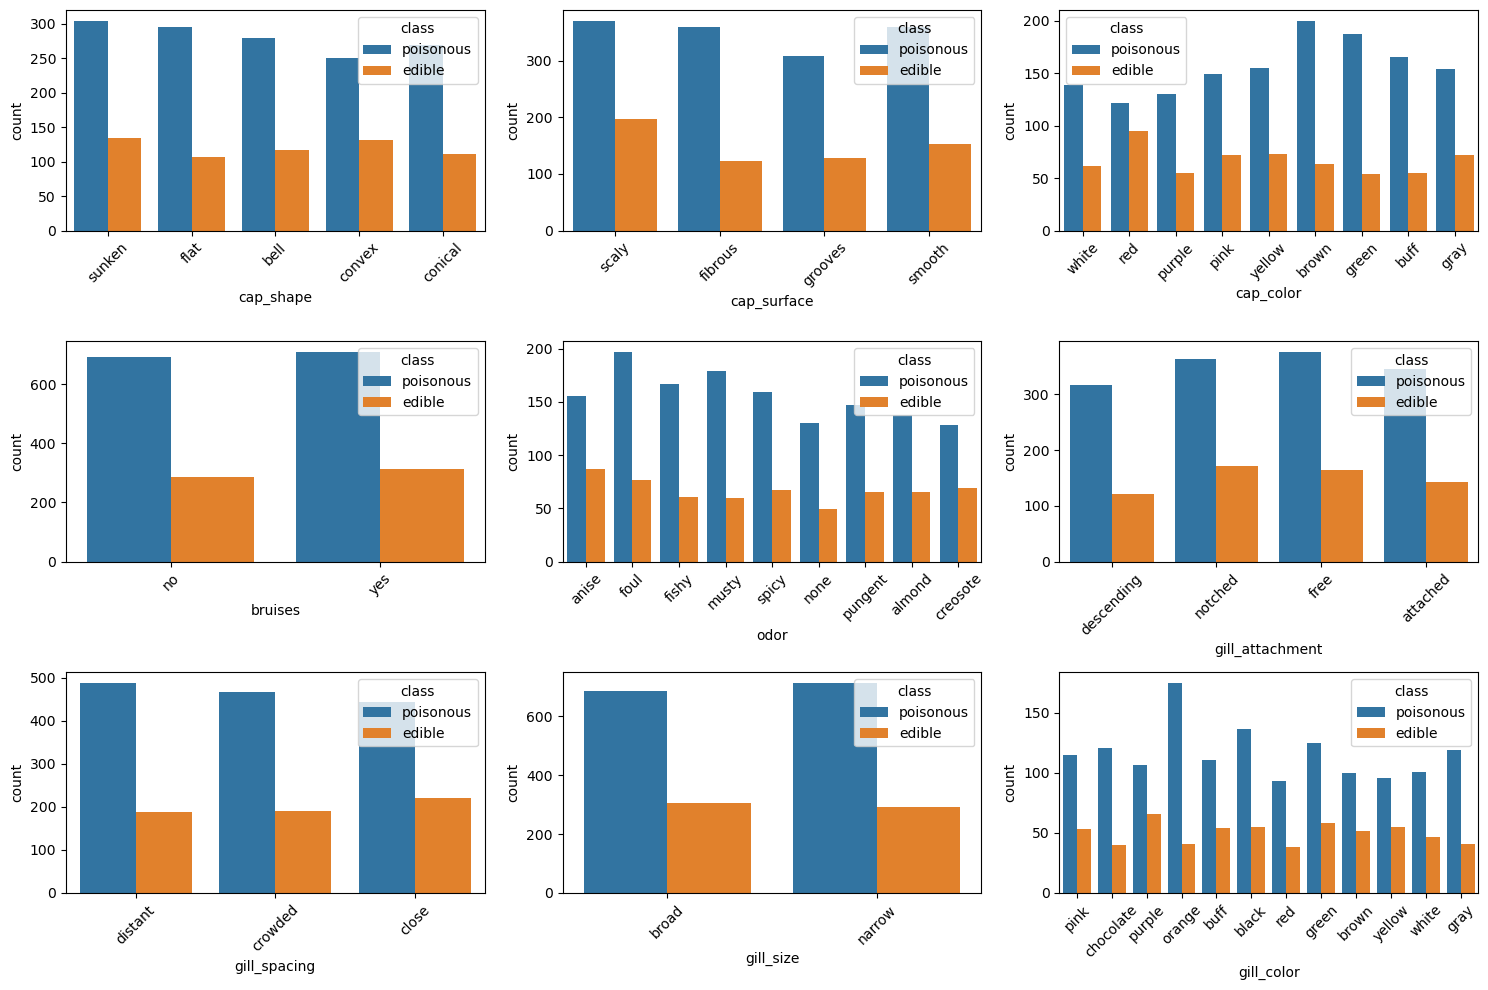


Cleaned Data:
      cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1985   conical     grooves     brown      no     foul         notched   
1988      bell     grooves      pink     yes    anise      descending   
1989    sunken      smooth    purple     yes    anise      descending   
1996    sunken       scaly    purple     yes    musty        attached   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broa

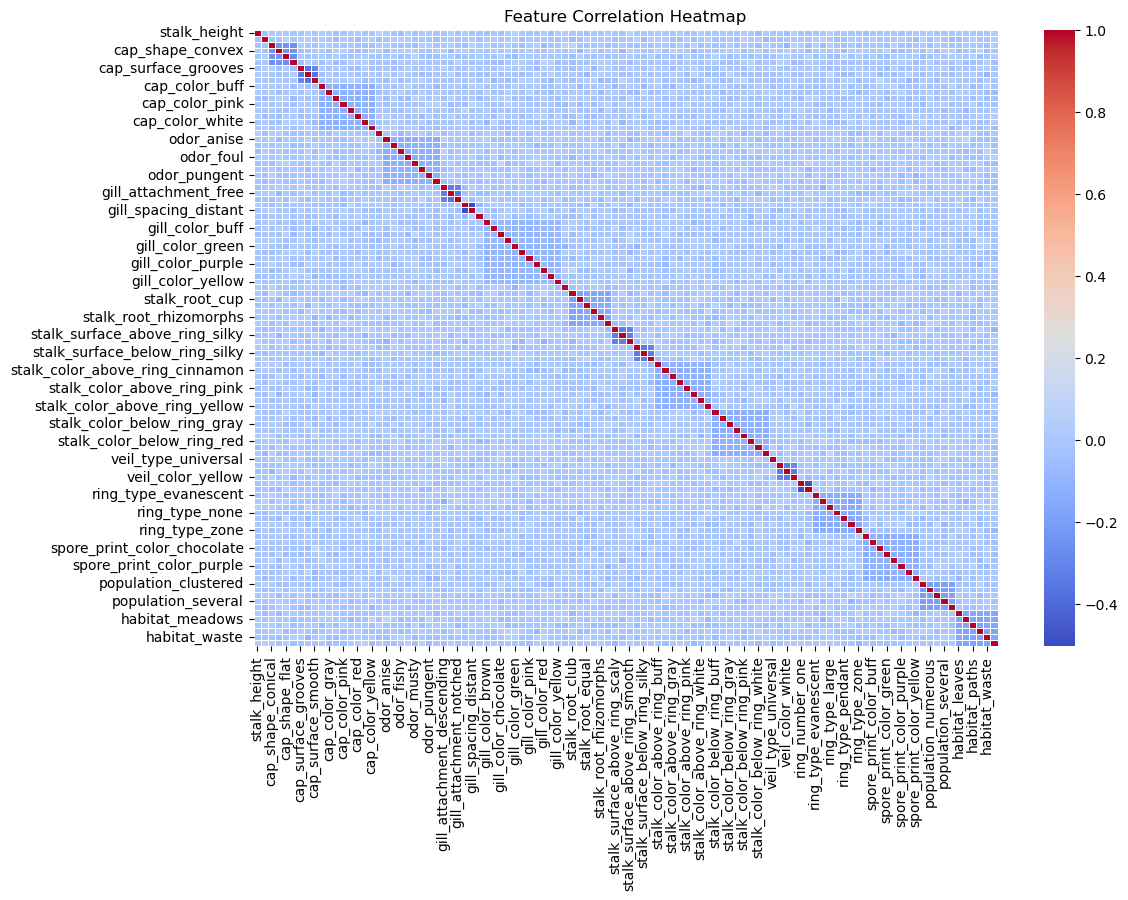


Accuracy: 0.5816326530612245

Classification Report:               precision    recall  f1-score   support

      edible       0.36      0.18      0.24        72
   poisonous       0.63      0.81      0.71       124

    accuracy                           0.58       196
   macro avg       0.50      0.50      0.48       196
weighted avg       0.53      0.58      0.54       196



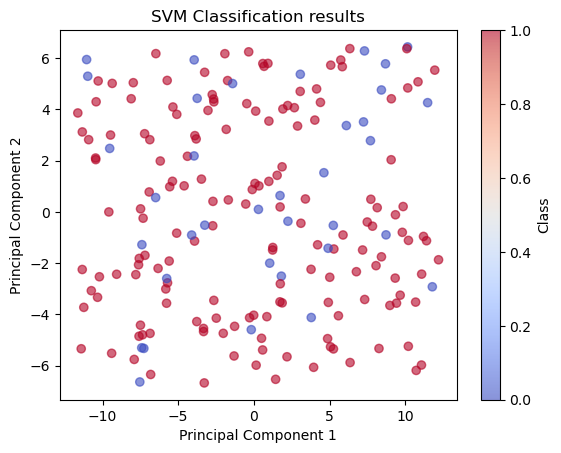


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

Optimized Accuracy: 0.6326530612244898

Kernel: sigmoid

Accuracy: 0.5255102040816326

Classification report:               precision    recall  f1-score   support

      edible       0.33      0.29      0.31        72
   poisonous       0.62      0.66      0.64       124

    accuracy                           0.53       196
   macro avg       0.47      0.48      0.47       196
weighted avg       0.51      0.53      0.52       196



In [11]:
def SVM():
    try:
        print("Step 1: Load and understand the data")
        df_Mushroom = pd.read_csv("mushroom.csv")

        print("\nStep 2: Check data types and details")
        df_Mushroom.info()

        print("\nChecking for missing values and duplicates")
        print(df_Mushroom.isnull().sum())
        print(f"Duplicate rows: {df_Mushroom.duplicated().sum()}")

        #Remove duplicate
        df_Mushroom_cleaned = df_Mushroom.drop_duplicates()
        print(f"Dataset after removing duplicates: {df_Mushroom_cleaned.shape}")

        df_Mushroom_cleaned = df_Mushroom_cleaned.drop('Unnamed: 0',axis=1)

        numerical_cols = df_Mushroom_cleaned.select_dtypes(include=['int64','float64']).columns
        categorical_col = df_Mushroom_cleaned.select_dtypes(include=['object']).columns
        print("\nNumerical colums:",numerical_cols)
        print("Categorical columns:",categorical_col)

        print("\nStep 3: Visualizing the data")
        plt.figure(figsize=(12,6))
        sns.countplot(data=df_Mushroom,x="class") #Class distribution (edible vs posisonous)
        plt.title("Class Distribution")
        plt.savefig("Class Distribution.png",dpi=300)
        plt.show()

        #To examine feature distribution
        plt.figure(figsize=(15,10))
        for i, col in enumerate(df_Mushroom.columns[1:10]):
            plt.subplot(3,3,i+1)
            sns.countplot(data=df_Mushroom, x = col, hue="class")
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig("Feature distribution.png",dpi=300)
        plt.show()

        #Apply label encoding to all categorical columns
        label_encoder = LabelEncoder()
        for col in categorical_col:
            df_Mushroom[col]= label_encoder.fit_transform(df_Mushroom[col])

        print("\nCleaned Data:\n",df_Mushroom_cleaned)
        #Separate features and target
        X = df_Mushroom_cleaned.drop(columns=['class'])
        y = df_Mushroom_cleaned['class']

        #Encode categorical features using One-Hot encoding
        X_encoded = pd.get_dummies(X,drop_first=True) #Avoid multicollinearity
        print("\nCategorical columns after one-hot encoding:\n",X_encoded.columns)

        #Splt datset into trainign and testing
        X_train,X_test, y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

        #Display shapes of training and testing sets
        print(f"\nTraning set: {X_train.shape}, Test set: {X_test.shape} ")

        #Compute correlation
        corr_matrix = X_encoded.corr()

        #Plot heatmap
        plt.figure(figsize=(12,8))
        sns.heatmap(corr_matrix,cmap='coolwarm',linewidths=0.5)
        plt.title("Feature Correlation Heatmap")
        plt.savefig("Feature Correlation Heatmap.png",dpi=300)
        plt.show()

        #Initilization and train the SVM model
        svm_model = SVC(kernel='linear',random_state=42)
        svm_model.fit(X_train,y_train)

        #Prediction
        y_pred = svm_model.predict(X_test)

        #Evaluation
        print("\nAccuracy:",accuracy_score(y_test,y_pred))
        print("\nClassification Report:",classification_report(y_test,y_pred))

        color_map = {'edible':0,'poisonous':1}
        y_pred_numeric = np.array([color_map[label] for label in y_pred])

        #Reduce to 2D using PCA visualization of SVM results
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_test)

        #Plot results
        plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred_numeric,cmap='coolwarm',alpha=0.6)
        plt.title("SVM Classification results")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.savefig("SVM Classification Results.png",dpi=300)
        plt.colorbar(label='Class')
        plt.show()

        #Define hyperparameters to tune
        param_grid = {
            'C':[0.1,1,10],
            'kernel':['linear','poly','rbf','sigmoid'],
            'gamma':['scale','auto'] 
            }
        
        #Grid search
        grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
        grid_search.fit(X_train,y_train)

        #Best parameters
        print("\nBest Parameters:",grid_search.best_params_)

        #Evaluate best model
        best_svm = grid_search.best_estimator_
        y_pred_best = best_svm.predict(X_test)
        print("\nOptimized Accuracy:",accuracy_score(y_test,y_pred_best))

        kernels = ['linear','poly','rbf','sigmoid']
        for kernel in kernels:
            model = SVC(kernel=kernel,random_state=42)
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)

        print(f"\nKernel: {kernel}")
        print("\nAccuracy:",accuracy_score(y_test,y_pred))
        print("\nClassification report:",classification_report(y_test,y_pred))     


    except FileNotFoundError:
        print("Error")


SVM()